In [28]:
import numpy as np
import matplotlib.pyplot as plt

#9.5 г

In [29]:
x = np.linspace(0,2,9)

print(x)

y = np.zeros(len(x))
y[0] = 1.

for i in range(1, len(x)):
    y[i] = np.arctan(x[i])  /x[i] # ??????

y = np.round(y, 6)

print(y)

[0.   0.25 0.5  0.75 1.   1.25 1.5  1.75 2.  ]
[1.       0.979915 0.927295 0.858001 0.785398 0.716844 0.655196 0.600943
 0.553574]


метод трапеций:

In [30]:
n = len(x)

def trapeze(h):
    I = 0.
    step = int(h/0.25)

    for i in range(0, n-1, step):
        I += h* (y[i] + y[i+step])/2

    print(np.round(I,6))
    

trapeze(0.25)
trapeze(0.5)

1.575095
1.572338


экстраполяция ричардсона:

In [31]:
round(1.575095 + (1.575095 - 1.572338) / (2**2 - 1), 6)

1.576014

метод симпсона

In [32]:
h = 0.25

I = 0.
for i in range(round(n / 2)):
    I += h / 3 * ( y[2*i] + 4 * y[2*i + 1] + y[2*i + 2])

print(round(I, 6)) 

1.576014


#9.10 б

$ \int_0^1 \dfrac{\cos x}{\sqrt{x}} d x  = \int_0^1 2 \cos(t^2) d t$


посчитала в тетрадке нужный шаг для метода трапеций

In [33]:

def f(x):
    return 2*np.cos(x*x)

def integ(h):
    x0 = np.arange(0, 1, h)

    I = 0.

    for i in range(0, len(x0)-1):
        I += h * (f(x0[i]) + f(x0[i+1]))/2

    print(np.round(I,6))
    

integ(1.25e-2)
integ(1.25e-5)

1.795238
1.809035


точное значение 1.80905

почему-то при теоретически рассчитанном шаге погрешность на 3 порядка больше требуемой

второй способ: разбить интеграл на два, один из которых оценить, а второй вычислить

$I = \int_0^\delta + \int_\delta^1 $ 

где $\delta$ выбирается из условия $\int_0^\delta < ɛ /2$

# 9.13 a

 
 $\int f(x) \sin ( kx) d x $



In [34]:
k = 50

x = np.linspace(0,4,5)
f = [0.00000, 0.50000, 0.86603, 1.00000, 0.86603]

n = 5

квадратичный сплайн, 12 коэффициентов

8 уравнений на f, непрерывность производной + 3 условия из производной + 1


In [35]:
A = np.zeros((3*(n-1), 3*(n-1)))

b = np.zeros(3*(n-1))

# ax^2 + bx + c = f_i
 

for i in range(0, n-1):
    for j in range(2):
        A[2*i+j][3*i] = x[i+j]**2
        A[2*i + j][3*i + 1] = x[i+j]
        A[2*i + j][3*i + 2] = 1

        if j == 0:
            b[2*i+j] = f[i]
        else:
            b[2*i+j] = f[i+1]

 # для производных 2ax + b

for i in range(n-2):
    A[2*(n-1) + i][3*i] = 2 * x[i+1]
    A[2*(n-1) + i][3*i + 1] = 1

    A[2*(n-1) + i][3*(i+1)] = -2 * x[i+1]
    A[2*(n-1) + i][3*(i+1) + 1] = -1


# ещё одно условие на конце

A[3*(n-1) - 1][0] = 1

print(A, b)

[[ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  1.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  4.  2.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  4.  2.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  9.  3.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  9.  3.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. 16.  4.  1.]
 [ 2.  1.  0. -2. -1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  4.  1.  0. -4. -1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  6.  1.  0. -6. -1.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]] [0.      0.5     0.5     0.86603 0.86603 1.      1.      0.86603 0.
 0.      0.      0.     ]


In [36]:
par = np.linalg.solve(A, b)
par

array([ 0.     ,  0.5    ,  0.     , -0.13397,  0.76794, -0.13397,
       -0.09809,  0.62442,  0.00955, -0.16985,  1.05498, -0.63629])

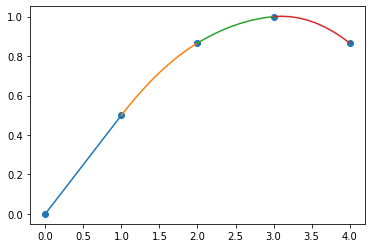

In [37]:
plt.scatter(x, f)

for i in range(n-1):
    l = np.linspace(x[i], x[i+1], 10)
    plt.plot(l, par[3*i]*l**2 + par[3*i+1]*l + par[3*i+2])    



ура сплайн


$\int x \ sin (kx) d x = \dfrac{\sin kx - k x \cos kx}{k^2}$

$\int x^2 \sin (kx) = \dfrac{(2 - k^2 x^2)\cos kx + 2 k x \sin kx}{k^3}$

$\int \sin x = - \frac{\cos kx}{k}$

In [38]:
I = 0.

for i in range(n-1):

    I += par[3*i+2]*(- np.cos(k*x[i]) + np.cos(k*x[i+1])) / k

    I += par[3*i + 1] /k**2 * ( np.sin(k*x[i]) - np.sin(k*x[i+1]) - k*x[i]*np.cos(k*x[i]) + k*x[i+1]*np.cos(k*x[i+1]))

    I += par[3*i] / k**3 * ( 2* np.cos(k*x[i]) - 2* np.cos(k*x[i+1]) 
                            - k**2*(x[i]**2 * np.cos(k*x[i]) - x[i+1]**2 * np.cos(k*x[i+1]))
                              + 2*k*(x[i]*np.sin(k*x[i]) - x[i+1]*np.sin(k*x[i+1]) )          )
print(-I)

-0.008331200515246967


значение из вольфрама для x(6-x)/9 

I = -0.0085

